In [6]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 읽어오기
imgs = []
imgs.append(cv2.imread('/Users/reejungkim/Documents/Git/Image classification/img/1.jpg'))
imgs.append(cv2.imread('/Users/reejungkim/Documents/Git/Image classification/img/2.jpg'))


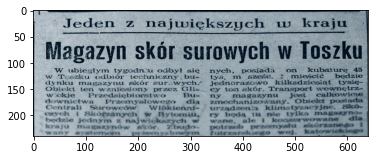

In [9]:
plt.imshow(cv2.imread('/Users/reejungkim/Documents/Git/Image classification/img/1.jpg'))

In [ ]:

hists = []
for img in imgs:
    # BGR 이미지를 HSV 이미지로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # 히스토그램 연산(파라미터 순서 : 이미지, 채널, Mask, 크기, 범위)
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # 정규화(파라미터 순서 : 정규화 전 데이터, 정규화 후 데이터, 시작 범위, 끝 범위, 정규화 알고리즘)
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    # hists 리스트에 저장
    hists.append(hist)

# 1번째 이미지를 원본으로 지정
query = hists[0]

# 비교 알고리즘의 이름들을 리스트에 저장
methods = ['CORREL', 'CHISQR', 'INTERSECT', 'BHATTACHARYYA', 'EMD']

# 5회 반복(5개 비교 알고리즘을 모두 사용)
for index, name in enumerate(methods):
    #비교 알고리즘 이름 출력(문자열 포맷팅 및 탭 적용)
    print('%-10s' % name, end = '\t')  
    
    #2회 반복(2장의 이미지에 대해 비교 연산 적용)
    for i, histogram in enumerate(hists):
        ret = cv2.compareHist(query, histogram, index) 
        
        if index == cv2.HISTCMP_INTERSECT:                   # 교차 분석인 경우 
            ret = ret/np.sum(query)                          # 원본으로 나누어 1로 정규화
            
        print("img%d :%7.2f"% (i+1 , ret), end='\t')        # 비교 결과 출력

    print()     